# E1 260: Optimization for Machine Learning and Data Science

**Homework 4: Stochastic gradient methods**


This homework as two parts. In the first part, there are a question related to theoretical aspects of stochastic gradient descent and averaging iterations. The second part has two questions related to the understanding of gradient descent, stochastic gradient descent and its mini-batch version, and implementing SGD and SVRG for softmax regression for classification of fashion MNIST dataset.


**Submission instructions:**


*   **Make a copy of the Colab .ipynb file** and **share the link of your Colab file with answers** as instructed.
* Use text cells to answer Part A of the homework. Type equations in Latex in a text cell.
* For the programming part of Part B of the homework, use code cell and text cell. The submitted codes should compile without any errors and do not erase the outputs.




---










In [ ]:
# Name: Imandi Bhargava Veera Lakshmana Raju
# SR number: 21190
# Program: MTech CSA
# Registration type (Credit/Audit): Credit



---



## Part A



**[50 pts] Question 1.** We wish to minimize the quadratic function

$$
f({\bf x}) = \frac{1}{2}{\bf x}^T{\bf P}{\bf x} - {\bf q}^T{\bf x}
$$
where ${\bf P} \in \mathbb{R}^{d \times d}$ and ${\bf q} \in \mathbb{R}^d$ with ${\bf x}^\star$ being the global minimum.

Suppose we have access to a noisy oracle for the gradient
$$
\tilde{\bf g}_t = \nabla f({\bf x}_t) + {\bf e}_t
$$
where we assume the noise ${\bf e}_t$ is is zero mean and uncorrelated with bounded variance $\mathbb{E}[{\bf e}_t{\bf e}_t^T] \leq \sigma^2{\bf I}$. Here $\sigma^2 \geq 0$.



1. Give the stochastic gradient iteration with a fixed step size $\eta$. 
2. Define ${\bf a}_t = {\bf x}_t - {\bf x}^\star$. Express  ${\bf a}_t$ iterms of the initial iterate ${\bf a}_0$, ${\bf P}$, $\eta$, and ${\bf e}_t$.
3. Suppose $\bar{\bf a}_t = \frac{1}{t}\sum\limits_{k=0}^t{\bf a}_k$. Show that

$$
\mathbb{E}\{\bar{\bf a}_t^T{\bf P}\bar{\bf a}_t\} \leq \frac{1}{\eta t}\|{\bf a}_0\|^2 + \frac{\sigma^2 d}{t}.
$$



*Hint:* You might need the inequality $\frac{(1 - (1-b)^t)^2}{bt} \leq 1$ for all $b \in [0,1]$.







**Solution 1.**
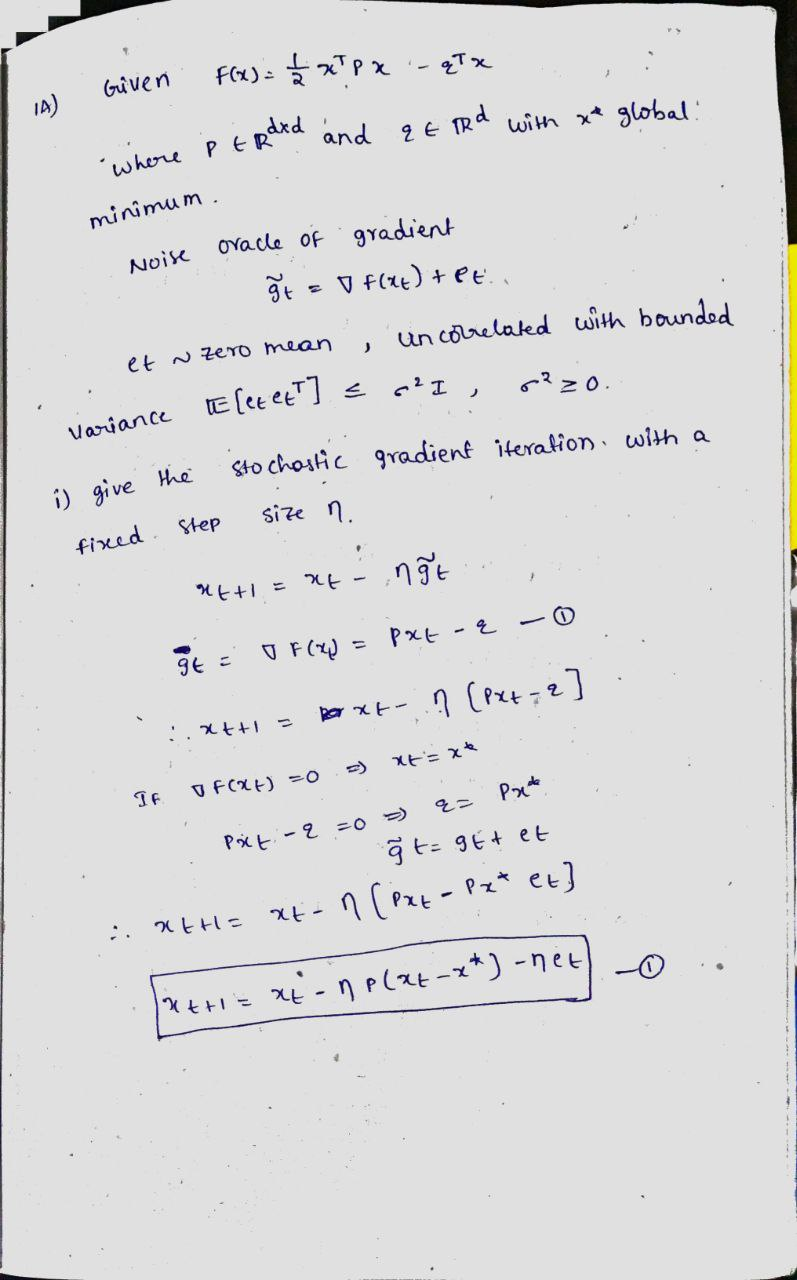
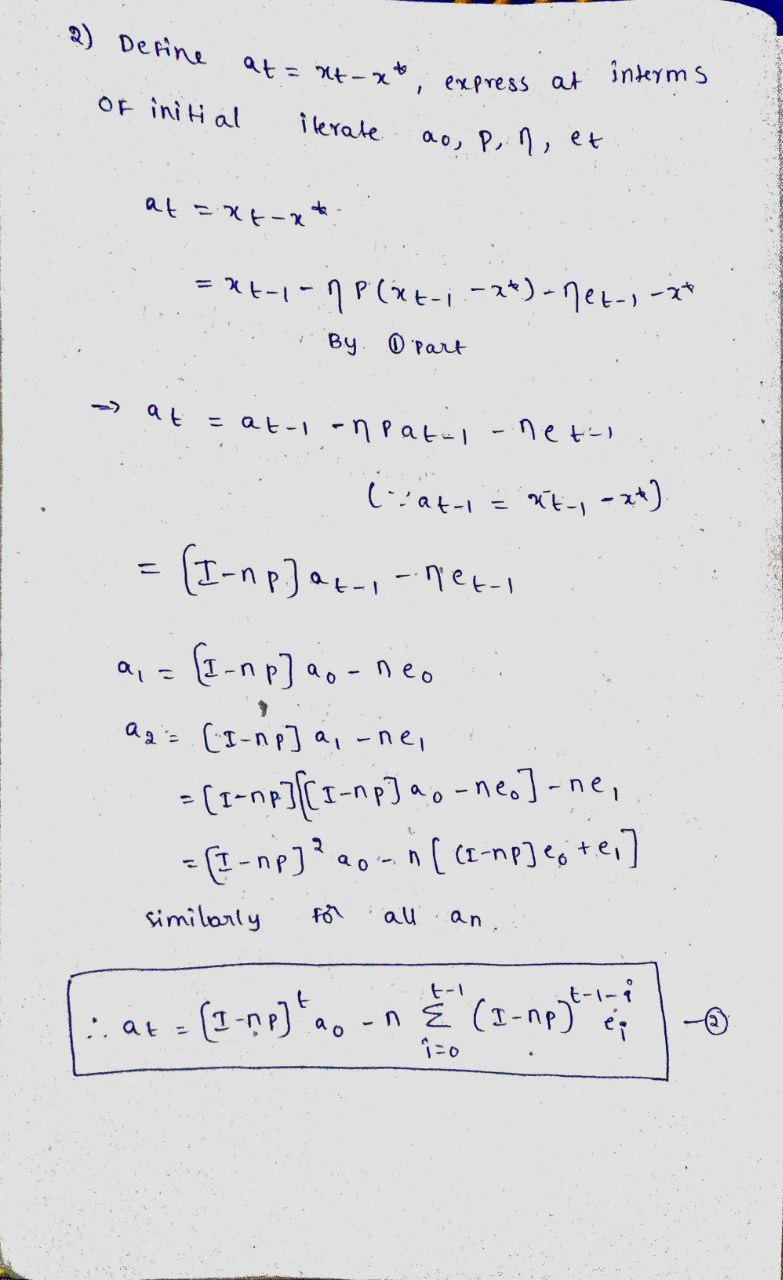

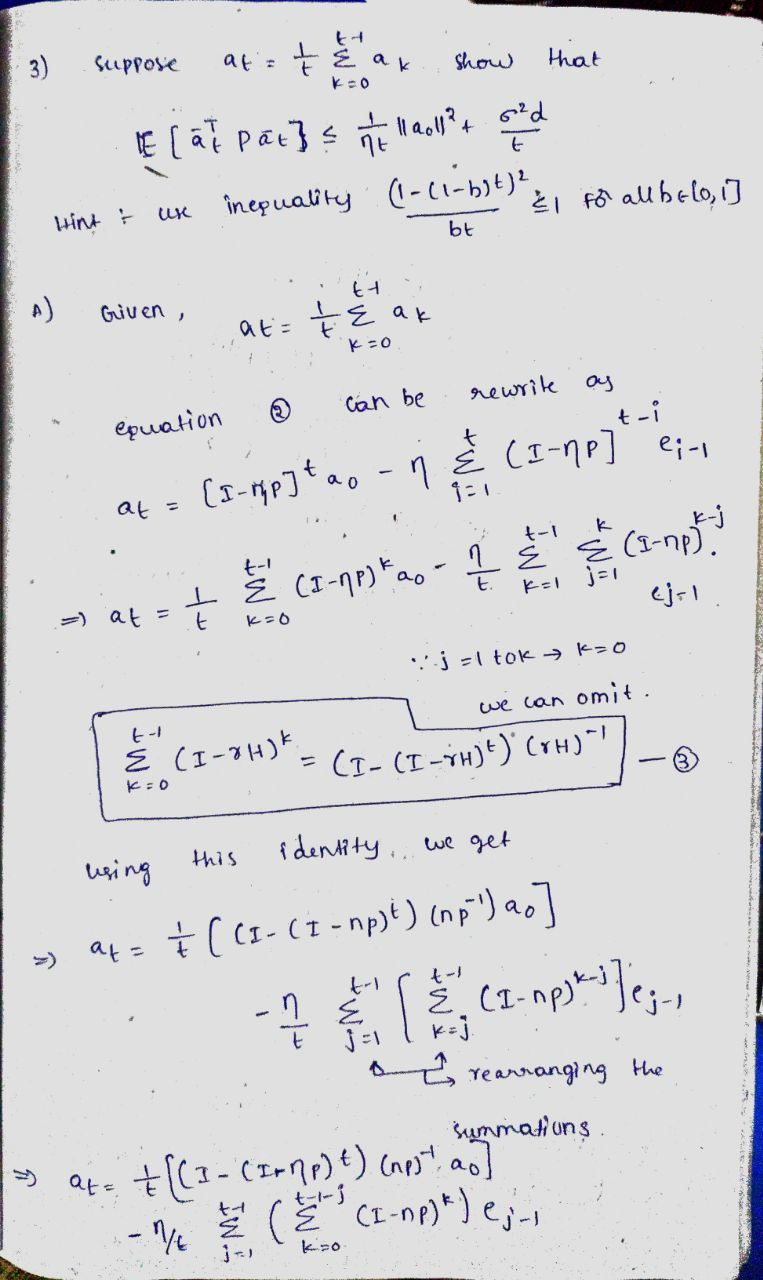

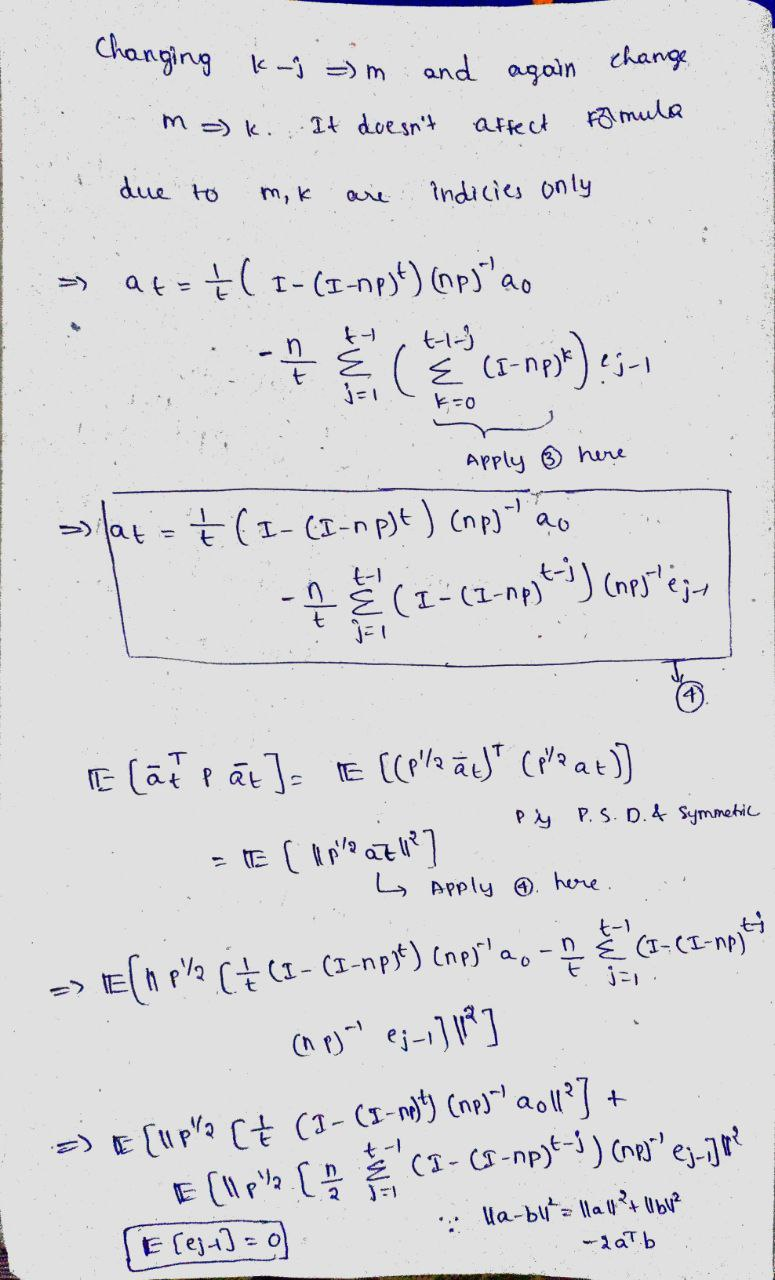

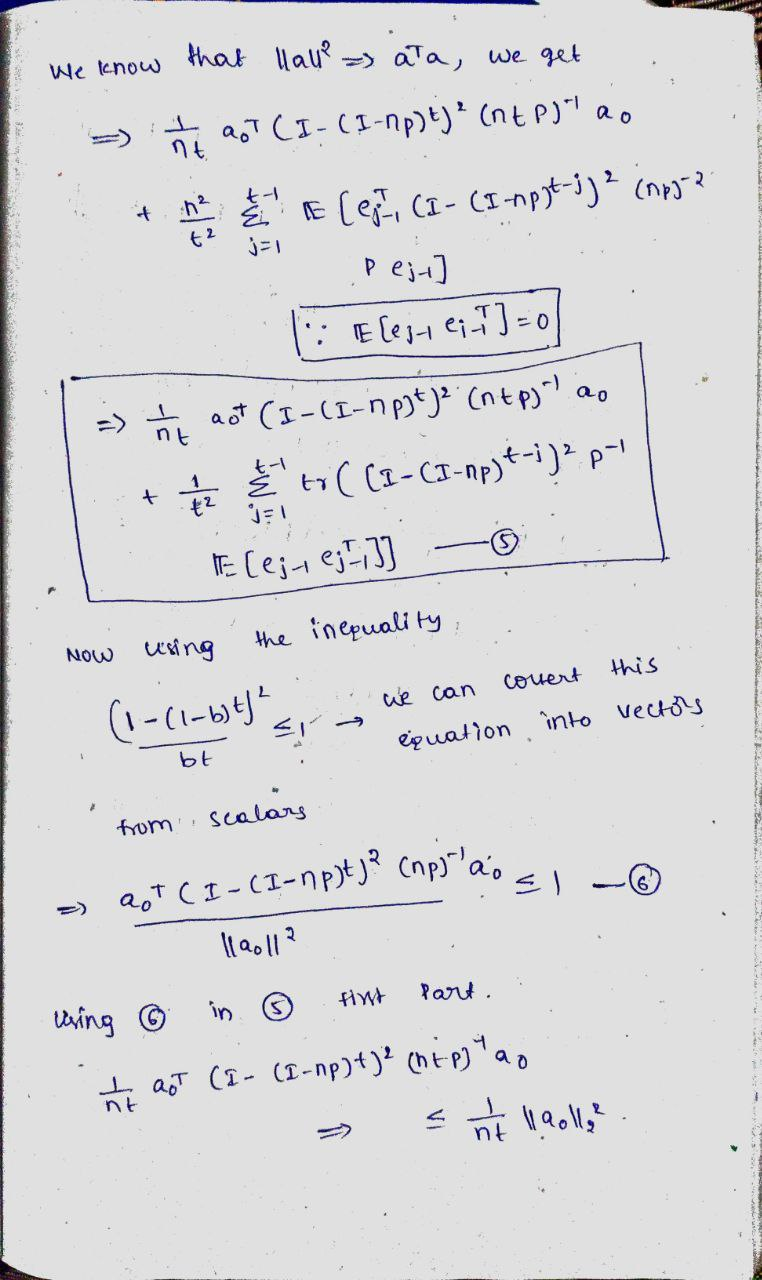

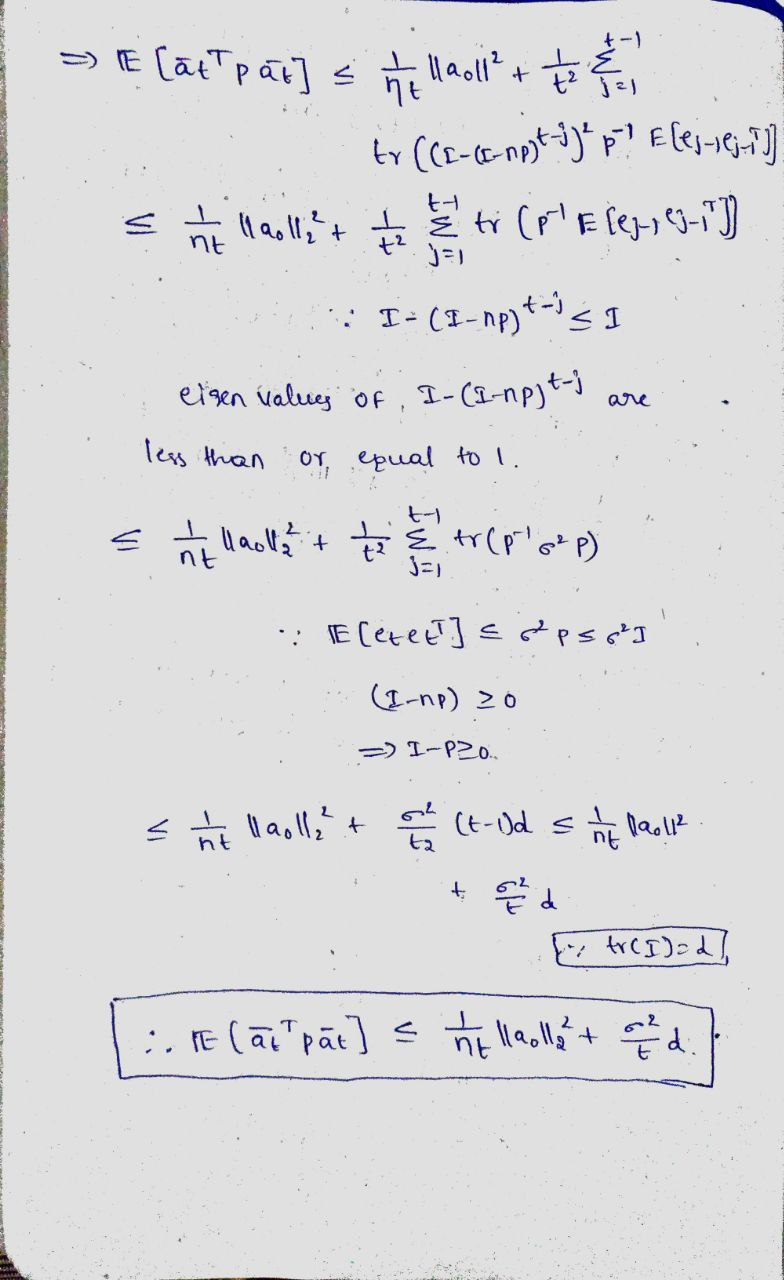






---



---



## Part B

This part has two programming questions on understanding of stochastic gradient descent and its application to softmax regression

**[20 pts] Question 2.** 


The aim of this question is to understand the gradient descent vs. stochastic gradient descent vs. mini-batch for a linear regression problem

$$
\underset{{\bf x}}{\text{minimize}} \quad f({\bf x}) = \frac{1}{m}\sum\limits_{i=1}^m ({\bf a}_i^T{\bf x} - {b}_i)^2.
$$

Consider a simple setting with ${\bf x} \in \mathbb{R}^2$ with $m=100$.






Display the iterates (e.g., see the picture below) of 

1.   Gradient descent with a fixed stepsize 0.1, for 100 iteration.
2.   Stochastic gradient descent with a varying stepsize. Use the stepsize_schedule function with eta0 = 5, etat1 = 50, and the number of iterations as 50.
3. Mini-batch gradient descent with a varying stepsize. Use the stepsize_schedule function with eta0=200, eta1=1000, batch size of 20 and the number of iterations as 50.

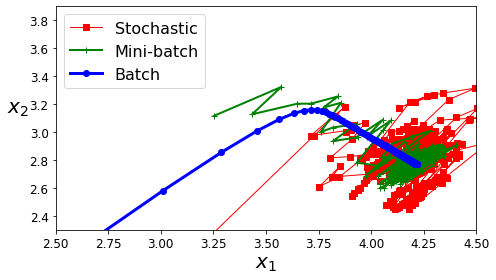





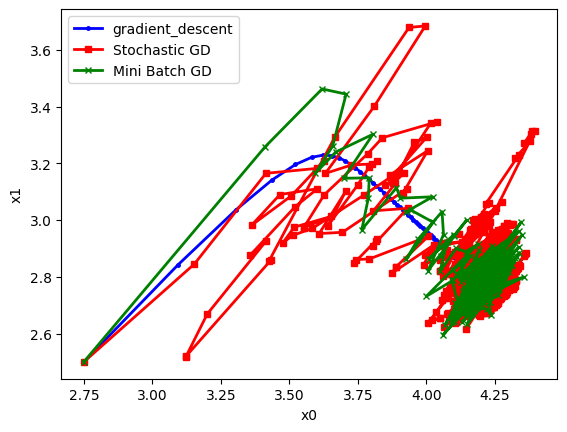

Final Estimates using Gradient Descent : 4.193284664985399 , 2.78937174881008
Final Estimates using Stochastic GD    : 4.191107862758954 , 2.7329490334012485
Final Estimates using Mini-Batch GD    : 4.149957792157648 , 2.703295432257829


In [ ]:
# Enter your code here
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Data generation
A_ = 2 * np.random.rand(100, 1)
y = 4 + 3 * A_ + np.random.randn(100, 1)
A = np.c_[np.ones((100, 1)), A_]  # add x0 = 1 to each instance
m=len(y)

# Step size schedule
def stepsize_schedule(eta, eta0, eta1):
    return eta0 / (eta + eta1)

#Gradient Descent
def gradientDescent(A,y,eta,num_iterations,m):
  x=np.zeros((num_iterations+1, 2, 1))
  x[0]=np.array([[2.75], [2.5]])
  for i in range(num_iterations):
    gradient = 2/m * A.T.dot(A.dot(x[i]) - y)
    x[i+1] = x[i] - eta*gradient
  return x,x[-1]

#Stochastic Gradient Descent
def stochasticGradDescent(A,y,eta1,eta2,num_iterations,m):
  c=0
  x=np.zeros((num_iterations*m+2,2,1))
  x[0]= np.array([[2.75], [2.5]])
  for i in range(num_iterations):
    for j in range(m):
        random_index = np.random.randint(m)
        ai = A[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * ai.T.dot(ai.dot(x[c]) - yi)
        eta = stepsize_schedule(i * m + j, eta1, eta2)
        x[c+1] = x[c] - eta * gradients
        c=c+1
    x[c+1] = x[c]
  return x,x[-1]

#Mini Batch Gradient Descent
def miniBatchGradDescenet(A,y,eta1,eta2,batch_size,num_iterations,m):
  c=0
  l=m//batch_size
  x = np.zeros((num_iterations*l+2,2,1))
  x[0]= np.array([[2.75], [2.5]])
  for i in range(num_iterations):
    shuffled_indices = np.random.permutation(m)
    A_shuffled = A[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for j in range(0, m, batch_size):
        random_index = np.random.randint(m)
        ai = A_shuffled[j:j+batch_size]
        yi = y_shuffled[j:j+batch_size]
        gradients = 2/batch_size * ai.T.dot(ai.dot(x[c]) - yi)
        eta = stepsize_schedule(i * m//batch_size + j, eta1, eta2)
        x[c+1] = x[c] - eta * gradients
        c=c+1
    x[c+1] = x[c]
  return x,x[-1]

#Gradient Descent
eta = 0.1
num_iterations = 100
X_values_gd,last_gd = gradientDescent(A, y, eta, num_iterations,m)
x_coords, y_coords = zip(*X_values_gd)
plt.plot(x_coords, y_coords, "b.-",linewidth=2, markersize=5 , label='gradient_descent')

# Stochastic Gradient Descent with varying step size
eta0 = 5
eta1 = 50
n_iterations = 50
x_values_sgd,last_sgd= stochasticGradDescent(A, y, eta0, eta1, n_iterations,m)
plt.plot(x_values_sgd[:, 0], x_values_sgd[:, 1], 'rs-', linewidth=2, markersize=5, label='Stochastic GD')


# Mini-batch Gradient Descent with varying step size
eta0 = 200
eta1 = 1000
batch_size = 20
n_iterations = 50
x_values_mbgd,last_mbgd = miniBatchGradDescenet(A, y, eta0, eta1, batch_size, n_iterations,m)
plt.plot(x_values_mbgd[:, 0], x_values_mbgd[:, 1], 'gx-', linewidth=2, markersize=5, label='Mini Batch GD')

plt.legend()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()


print(f"Final Estimates using Gradient Descent : {last_gd[0][0]} , {last_gd[1][0]}") 
print(f"Final Estimates using Stochastic GD    : {last_sgd[0][0]} , {last_sgd[1][0]}")
print(f"Final Estimates using Mini-Batch GD    : {last_mbgd[0][0]} , {last_mbgd[1][0]}")


**[30 pts] Question 3.** Softmax regression.

Implement **stochastic gradient descent, stochastic gradient descent with momentum, and stochastic variance reduced gradient (SVRG)** for *softmax regression* (refer softmax regression problem from Homework 1). 

We will work with the fashion MNIST dataset. 
 
 


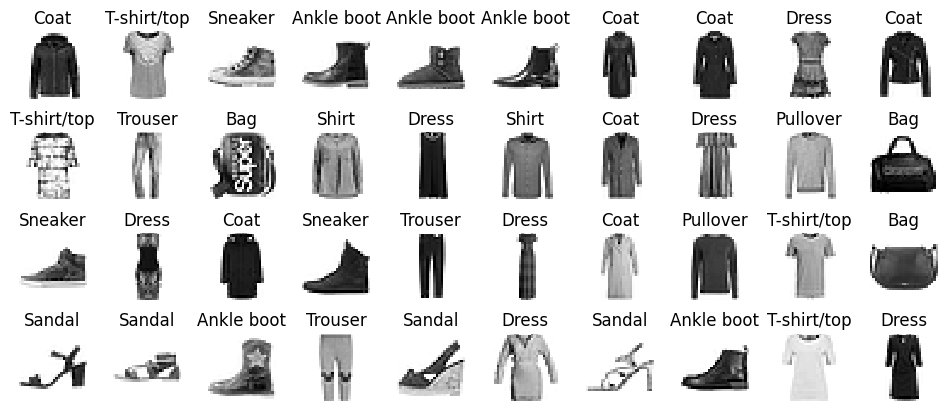

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#Split the full training set into a validation set and a (smaller) training set. 
#We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

#convert the vector of class indices into a matrix containing a one-hot vector for each instance
num_classes = 10
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes)
y_valid_onehot = tf.keras.utils.to_categorical(y_valid, num_classes)
y_test__onehot = tf.keras.utils.to_categorical(y_test, num_classes)

# Sample dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Implementation**

Show the loss and accuracy for different iterations for

1. Stochastic gradient descent 
2. Stochastic gradient descent with momentum 
3. Stochastic variance reduced gradient (SVRG)

Choose the stepsize and momentum coefficients to obtain meaningful learning curves. 

Also, compare the test accuracy of the above three optimizers with the [sklearn.linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) solver that you have used in Homework 1.

Comment on your observations.






In [3]:
import numpy as np

def softmax(x):
    # Compute the softmax of vector x.
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_pred, y_true):
    # Compute the cross entropy loss between predicted and true labels.
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred)) / m
    return loss

In [4]:
X_train = X_train.reshape((55000, 784))
X_valid = X_valid.reshape((5000,784))
X_test = X_test.reshape((10000,784))

In [ ]:
#Even though it is stochastic gradient descent i took batch size as 32 due to large data set . If we took 1 sample per iteration it takes so much amount of time.

In [ ]:
def sgd(X_train, y_train,X_valid,y_valid,learning_rate=0.01, num_epochs=100, batch_size=32):
    # Implement stochastic gradient descent for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size

    m1 = X_valid.shape[0]
    
    # Initialize weights randomly
    W = np.random.randn(n, len(np.unique(y_train)))
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1

    y_onehot_valid = np.zeros((m1,len(np.unique(y_valid))))
    y_onehot_valid[np.arange(m1),y_valid] =1
    
    # Training loop
    train_losses = []
    train_accuracies = []
    valid_losses =[]
    valid_accuracies =[]
    for epoch in range(num_epochs):
        # Shuffle the data
        permuted_indices = np.random.permutation(m)
        X_shuffled = X_train[permuted_indices]
        y_shuffled = y_train[permuted_indices]
        y_onehot_shuffled = y_onehot[permuted_indices]
        
        for i in range(num_batches):
            # Get the current batch
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            y_onehot_batch = y_onehot_shuffled[start_idx:end_idx]
            
            # Forward pass
            z = np.dot(X_batch, W) + b
            y_pred = softmax(z)
            loss = cross_entropy_loss(y_pred, y_onehot_batch)
            
            # Backward pass
            dW = np.dot(X_batch.T, y_pred - y_onehot_batch) / batch_size
            db = np.mean(y_pred - y_onehot_batch, axis=0)
            
            # Update weights and biases
            W -= learning_rate * dW
            b -= learning_rate * db
            
        # Compute the loss and accuracy for the whole dataset
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot)
        train_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_train)
        train_accuracies.append(accuracy)

        # Print the loss and accuracy for each epoch
        print("Epoch {}: loss = {:.4f}, accuracy = {:.4f}".format(epoch, loss, accuracy))

        z = np.dot(X_valid, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot_valid)
        valid_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_valid)
        valid_accuracies.append(accuracy)
    return W, b, train_losses, train_accuracies,valid_losses , valid_accuracies

W, b, train_losses, train_accuracies,valid_losses , valid_accuracies = sgd(X_train,y_train,X_valid,y_valid)

Epoch 0: loss = 2.2168, accuracy = 0.5773
Epoch 1: loss = 1.7330, accuracy = 0.6512
Epoch 2: loss = 1.5201, accuracy = 0.6837
Epoch 3: loss = 1.3835, accuracy = 0.7040
Epoch 4: loss = 1.2909, accuracy = 0.7177
Epoch 5: loss = 1.2171, accuracy = 0.7278
Epoch 6: loss = 1.1713, accuracy = 0.7351
Epoch 7: loss = 1.1165, accuracy = 0.7446
Epoch 8: loss = 1.0767, accuracy = 0.7504
Epoch 9: loss = 1.0454, accuracy = 0.7543
Epoch 10: loss = 1.0153, accuracy = 0.7605
Epoch 11: loss = 0.9936, accuracy = 0.7630
Epoch 12: loss = 0.9680, accuracy = 0.7688
Epoch 13: loss = 0.9513, accuracy = 0.7700
Epoch 14: loss = 0.9275, accuracy = 0.7726
Epoch 15: loss = 0.9089, accuracy = 0.7750
Epoch 16: loss = 0.8954, accuracy = 0.7773
Epoch 17: loss = 0.8795, accuracy = 0.7813
Epoch 18: loss = 0.8652, accuracy = 0.7828
Epoch 19: loss = 0.8510, accuracy = 0.7824
Epoch 20: loss = 0.8396, accuracy = 0.7839
Epoch 21: loss = 0.8280, accuracy = 0.7878
Epoch 22: loss = 0.8182, accuracy = 0.7880
Epoch 23: loss = 0.80

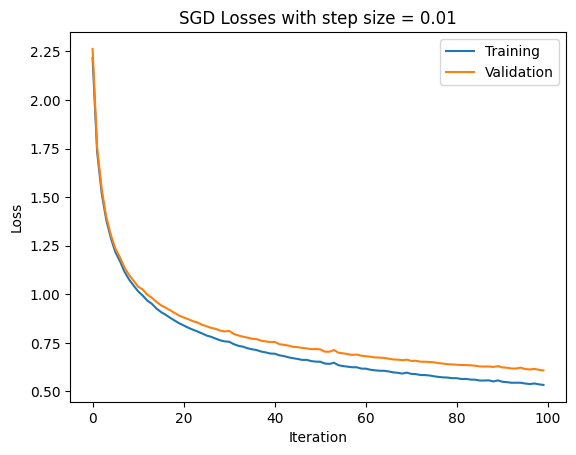

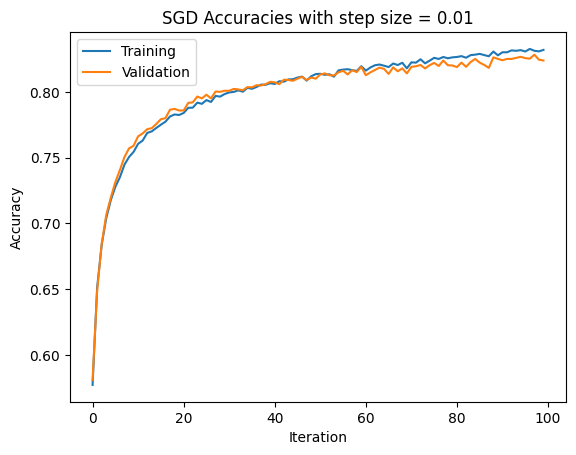

In [ ]:
plt.plot(train_losses , label='Training')
plt.plot(valid_losses, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('SGD Losses with step size = 0.01')
plt.legend()
plt.show()

plt.plot(train_accuracies,label='Training')
plt.plot(valid_accuracies, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SGD Accuracies with step size = 0.01')
plt.legend()
plt.show()

In [ ]:
#Testing with SGD
z = np.dot(X_test, W) + b
y_pred = softmax(z)
accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
print(f"Accuracy on testing data set with SGD : {accuracy}")

Accuracy on testing data set with SGD : 0.8117


In [ ]:
def sgd_momentum(X_train, y_train,X_valid,y_valid,learning_rate=0.01, num_epochs=100, batch_size=32,momentum_coefficient = 0.9):
    # Implement stochastic gradient descent with momentum for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size

    m1 = X_valid.shape[0]
    
    # Initialize weights randomly
    W = np.random.randn(n, len(np.unique(y_train)))
    velocity1 = np.zeros((n, 10))
    b = np.zeros(len(np.unique(y_train)))
    velocity2 = np.zeros((10))
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1

    y_onehot_valid = np.zeros((m1,len(np.unique(y_valid))))
    y_onehot_valid[np.arange(m1),y_valid] =1
    
    # Training loop
    train_losses = []
    train_accuracies = []
    valid_losses =[]
    valid_accuracies =[]
    for epoch in range(num_epochs):
        # Shuffle the data
        permuted_indices = np.random.permutation(m)
        X_shuffled = X_train[permuted_indices]
        y_shuffled = y_train[permuted_indices]
        y_onehot_shuffled = y_onehot[permuted_indices]
        
        for i in range(num_batches):
            # Get the current batch
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            y_onehot_batch = y_onehot_shuffled[start_idx:end_idx]
            
            # Forward pass
            z = np.dot(X_batch, W) + b
            y_pred = softmax(z)
            loss = cross_entropy_loss(y_pred, y_onehot_batch)
            
            # Backward pass
            dW = np.dot(X_batch.T, y_pred - y_onehot_batch) / batch_size
            db = np.mean(y_pred - y_onehot_batch, axis=0)

            #Updating velocities and weight
            velocity1 = momentum_coefficient * velocity1 - learning_rate * dW 
            velocity2 = momentum_coefficient * velocity2 - learning_rate * db   
            # Update weights and biases
            W += velocity1
            b += velocity2
            
        # Compute the loss and accuracy for the whole dataset
        z = np.dot(X_train, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot)
        train_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_train)
        train_accuracies.append(accuracy)

        # Print the loss and accuracy for each epoch
        print("Epoch {}: loss = {:.4f}, accuracy = {:.4f}".format(epoch, loss, accuracy))

        z = np.dot(X_valid, W) + b
        y_pred = softmax(z)
        loss = cross_entropy_loss(y_pred, y_onehot_valid)
        valid_losses.append(loss)
        accuracy = np.mean(np.argmax(y_pred, axis=1) == y_valid)
        valid_accuracies.append(accuracy)
    return W, b, train_losses, train_accuracies,valid_losses , valid_accuracies


W, b, train_losses, train_accuracies,valid_losses , valid_accuracies = sgd_momentum(X_train,y_train,X_valid,y_valid)

Epoch 0: loss = 1.1309, accuracy = 0.7509
Epoch 1: loss = 0.8903, accuracy = 0.7837
Epoch 2: loss = 0.7796, accuracy = 0.7965
Epoch 3: loss = 0.7369, accuracy = 0.8061
Epoch 4: loss = 0.6890, accuracy = 0.8088
Epoch 5: loss = 0.6833, accuracy = 0.8026
Epoch 6: loss = 0.6259, accuracy = 0.8223
Epoch 7: loss = 0.6169, accuracy = 0.8170
Epoch 8: loss = 0.6128, accuracy = 0.8247
Epoch 9: loss = 0.5677, accuracy = 0.8322
Epoch 10: loss = 0.5381, accuracy = 0.8357
Epoch 11: loss = 0.5496, accuracy = 0.8330
Epoch 12: loss = 0.5317, accuracy = 0.8402
Epoch 13: loss = 0.5076, accuracy = 0.8431
Epoch 14: loss = 0.5194, accuracy = 0.8365
Epoch 15: loss = 0.4883, accuracy = 0.8428
Epoch 16: loss = 0.4981, accuracy = 0.8378
Epoch 17: loss = 0.4842, accuracy = 0.8454
Epoch 18: loss = 0.5066, accuracy = 0.8317
Epoch 19: loss = 0.4715, accuracy = 0.8486
Epoch 20: loss = 0.4888, accuracy = 0.8455
Epoch 21: loss = 0.4559, accuracy = 0.8527
Epoch 22: loss = 0.4851, accuracy = 0.8452
Epoch 23: loss = 0.45

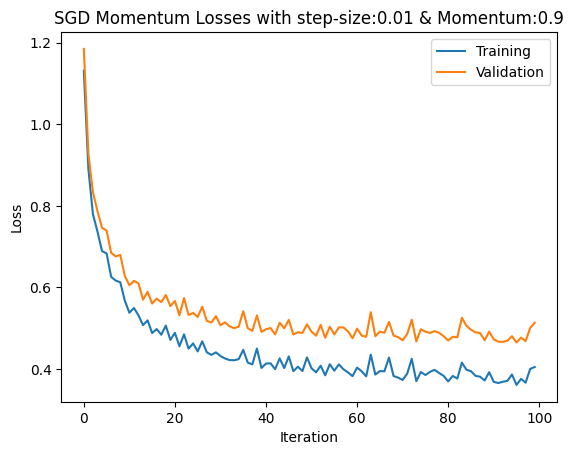

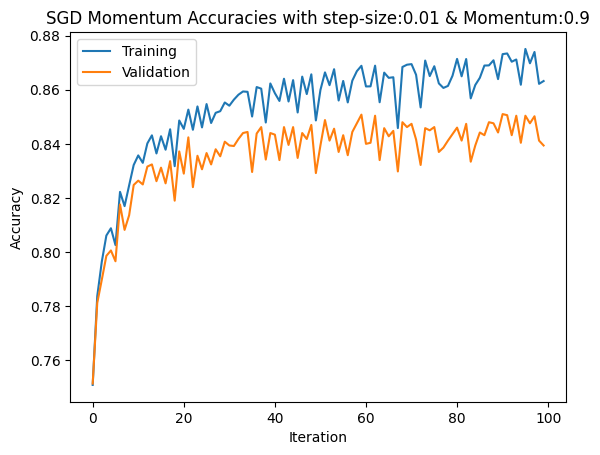

In [ ]:
plt.plot(train_losses , label='Training')
plt.plot(valid_losses, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('SGD Momentum Losses with step-size:0.01 & Momentum:0.9')
plt.legend()
plt.show()

plt.plot(train_accuracies,label='Training')
plt.plot(valid_accuracies, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SGD Momentum Accuracies with step-size:0.01 & Momentum:0.9')
plt.legend()
plt.show()

In [ ]:
#Testing with SGD
z = np.dot(X_test, W) + b
y_pred = softmax(z)
accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
print(f"Accuracy on testing data set with SGD Momentum : {accuracy}")

Accuracy on testing data set with SGD Momentum : 0.8287


In [5]:
def svrg(X_train, y_train,X_valid,y_valid,learning_rate=0.001, num_epochs=100, batch_size=32,update_frequency=22):
    # Implement stochastic variance reduced gradient for softmax regression.

    m = X_train.shape[0]
    n= X_train.shape[1]
    num_batches = m // batch_size

    m1 = X_valid.shape[0]
    
    # Initialize weights randomly
    W = np.zeros([n, len(np.unique(y_train))])
    b = np.zeros(len(np.unique(y_train)))
    
    # One-hot encode the labels
    y_onehot = np.zeros((m, len(np.unique(y_train))))
    y_onehot[np.arange(m), y_train] = 1
    y_onehot_valid = np.zeros((m1,len(np.unique(y_valid))))
    y_onehot_valid[np.arange(m1),y_valid] =1
    

    # Training loop
    train_losses = []
    train_accuracies = []
    valid_losses =[]
    valid_accuracies =[]
    for epoch in range(num_epochs):
      if epoch % update_frequency == 0:
            W_full_grad = np.zeros_like(W)
            b_full_grad = np.zeros_like(b)

            z = np.dot(X_train, W) + b
            y_pred = softmax(z)
            full_grad_W = np.dot(X_train.T, y_pred - y_train_onehot) / m
            full_grad_b = np.mean(y_pred - y_train_onehot, axis=0)

            W_temp = np.copy(W)
            b_temp = np.copy(b)
      permuted_indices = np.random.permutation(m)
      X_shuffled = X_train[permuted_indices]
      y_shuffled = y_train_onehot[permuted_indices]

      for i in range(num_batches):
          start_idx = i * batch_size
          end_idx = start_idx + batch_size
          X_batch = X_shuffled[start_idx:end_idx]
          y_batch = y_shuffled[start_idx:end_idx]

          z = np.dot(X_batch, W_temp) + b_temp
          y_pred_temp = softmax(z)

          grad_W_temp = np.dot(X_batch.T, y_pred_temp - y_batch) / batch_size
          grad_b_temp = np.mean(y_pred_temp - y_batch, axis=0)

          z = np.dot(X_batch, W) + b
          y_pred = softmax(z)

          grad_W = np.dot(X_batch.T, y_pred - y_batch) / batch_size
          grad_b = np.mean(y_pred - y_batch, axis=0)

          W -= learning_rate * (grad_W - grad_W_temp + full_grad_W)
          b -= learning_rate * (grad_b - grad_b_temp + full_grad_b)

      z = np.dot(X_train, W) + b
      y_pred = softmax(z)
      loss = cross_entropy_loss(y_pred, y_train_onehot)
      train_losses.append(loss)
      accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_train_onehot, axis=1))
      train_accuracies.append(accuracy)

      # Print the loss and accuracy for each epoch
      print("Epoch {}: loss = {:.4f}, accuracy = {:.4f}".format(epoch, loss, accuracy))

      z = np.dot(X_valid, W) + b
      y_pred = softmax(z)
      loss = cross_entropy_loss(y_pred, y_valid_onehot)
      valid_losses.append(loss)
      accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_valid_onehot, axis=1))
      valid_accuracies.append(accuracy)
    return W, b, train_losses, train_accuracies, valid_losses, valid_accuracies

W, b, train_losses, train_accuracies,valid_losses , valid_accuracies = svrg(X_train,y_train,X_valid,y_valid)

Epoch 0: loss = 1.1162, accuracy = 0.6789
Epoch 1: loss = 0.9160, accuracy = 0.7170
Epoch 2: loss = 0.8267, accuracy = 0.7428
Epoch 3: loss = 0.7727, accuracy = 0.7577
Epoch 4: loss = 0.7349, accuracy = 0.7700
Epoch 5: loss = 0.7067, accuracy = 0.7791
Epoch 6: loss = 0.6845, accuracy = 0.7847
Epoch 7: loss = 0.6658, accuracy = 0.7914
Epoch 8: loss = 0.6504, accuracy = 0.7951
Epoch 9: loss = 0.6370, accuracy = 0.7990
Epoch 10: loss = 0.6257, accuracy = 0.8021
Epoch 11: loss = 0.6154, accuracy = 0.8054
Epoch 12: loss = 0.6064, accuracy = 0.8074
Epoch 13: loss = 0.5984, accuracy = 0.8091
Epoch 14: loss = 0.5909, accuracy = 0.8107
Epoch 15: loss = 0.5846, accuracy = 0.8125
Epoch 16: loss = 0.5781, accuracy = 0.8145
Epoch 17: loss = 0.5727, accuracy = 0.8158
Epoch 18: loss = 0.5673, accuracy = 0.8168
Epoch 19: loss = 0.5627, accuracy = 0.8180
Epoch 20: loss = 0.5579, accuracy = 0.8192
Epoch 21: loss = 0.5539, accuracy = 0.8194
Epoch 22: loss = 0.5496, accuracy = 0.8213
Epoch 23: loss = 0.54

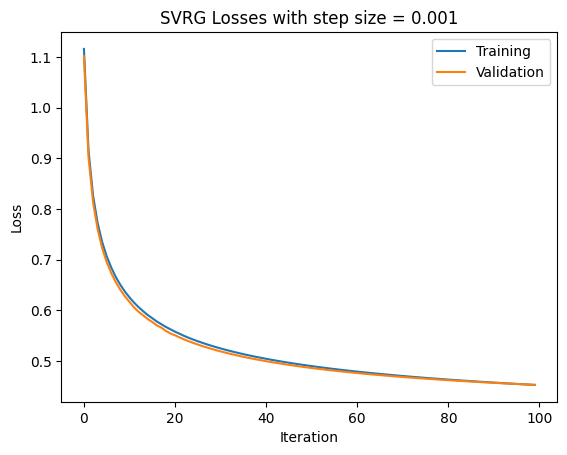

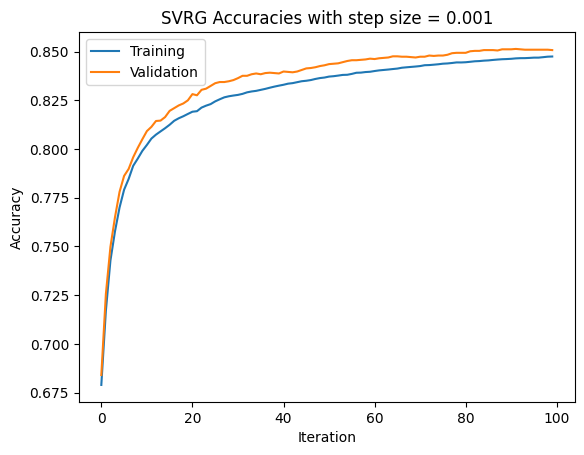

In [6]:
plt.plot(train_losses , label='Training')
plt.plot(valid_losses, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('SVRG Losses with step size = 0.001')
plt.legend()
plt.show()

plt.plot(train_accuracies,label='Training')
plt.plot(valid_accuracies, label ='Validation')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SVRG Accuracies with step size = 0.001')
plt.legend()
plt.show()

In [7]:
#Testing with SGD
z = np.dot(X_test, W) + b
y_pred = softmax(z)
accuracy = np.mean(np.argmax(y_pred, axis=1) == y_test)
print(f"Accuracy on testing data set with SVRG : {accuracy}")

Accuracy on testing data set with SVRG : 0.8338


In [ ]:
#Using Sklearn modules 
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train/255.
X_test = X_test / 255.
X_train = X_train.reshape((60000, 784))
X_test = X_test.reshape((10000,784))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8439


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Comparing results with Sklearn.linear.model**

Accuracy for SGD = 0.8177

Accuracy for SGD with Momentum = 0.8287

Accuracy for SRVG = 0.8338

Accuracy for sklearn.linear_model = 0.8439
